In [2]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("smsspamcollection.tsv",sep="\t")

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [8]:
df["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

#
Balancing the  data

In [10]:
ham=df[df["label"]=="ham"]

In [11]:
ham

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [12]:
spam=df[df["label"]=="spam"]

In [13]:
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [14]:
ham=ham.sample(spam.shape[0])

In [15]:
ham.shape

(747, 4)

In [16]:
df1=pd.DataFrame(ham)

In [17]:
df2=pd.DataFrame(spam)

In [18]:
data=pd.concat([df1,df2], ignore_index=True)

In [19]:
data

,label,message,length,punct
0,ham,"Two fundamentals of cool life: ""Walk, like you...",125,15
1,ham,Hey... Very inconvenient for your sis a not huh?,48,4
2,ham,Holy living christ what is taking you so long,45,0
3,ham,Yup ok...,9,3
4,ham,Hey next sun 1030 there's a basic yoga course....,138,14
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


#
Data Visualisation 

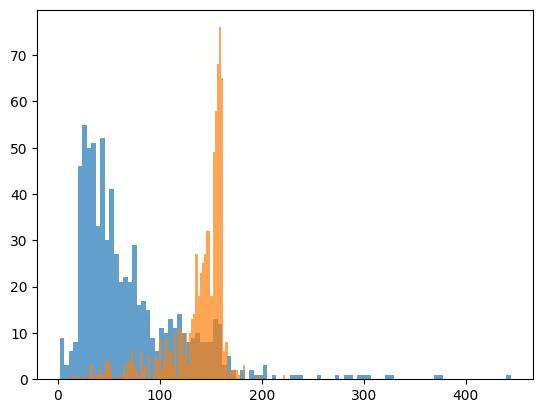

In [21]:
plt.hist(data[data["label"]=="ham"]["length"],bins=100, alpha=0.7)
plt.hist(data[data["label"]=="spam"]["length"],bins=100, alpha=0.7)
plt.show()

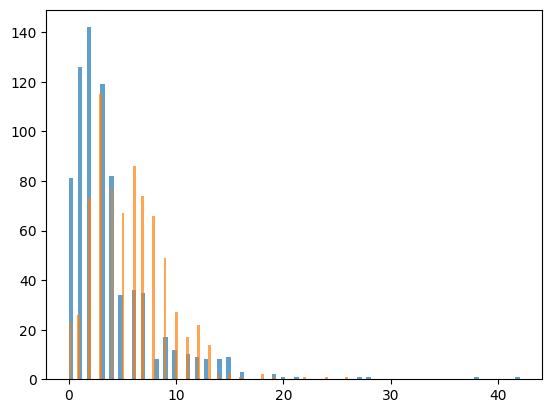

In [22]:
plt.hist(data[data["label"]=="ham"]["punct"],bins=100, alpha=0.7)
plt.hist(data[data["label"]=="spam"]["punct"],bins=100, alpha=0.7)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(data["message"],data["label"],test_size=0.3, random_state=0, shuffle=True)

In [25]:
x_train

1438      You have 1 new message. Please call 08715205273
431                  Ok.ok ok..then..whats ur todays plan
194     hey, looks like I was wrong and one of the kap...
240     Oh and by the way you do have more food in you...
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559     Tick, tick, tick .... Where are you ? I could ...
684                      Sorry,in meeting I'll call later
Name: message, Length: 1045, dtype: object

#
2)Building the model

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [28]:
classifier=Pipeline([("tfidf",TfidfVectorizer()),("classifier", RandomForestClassifier(n_estimators=100))])

In [54]:
classifier=Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=100))])

In [56]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

#
3)Predicting the results (Random Forest)

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
y_pred=classifier.predict(x_test)

In [63]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[226,   1],
       [ 24, 198]])

In [71]:
#Classification Report
print(classification_report(y_test,y_pred))
#we are getting almost 95% accuracy

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       227
        spam       0.99      0.89      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [73]:
accuracy_score(y_test, y_pred)
#94.5% Accuracy

0.9443207126948775

In [75]:
#Predict a real Message
classifier.predict(["Hello You Are Learning Natural Language Processing"])

array(['ham'], dtype=object)

In [79]:
classifier.predict(["Hope you  are doing good and  learning new things!"])

array(['ham'], dtype=object)

In [87]:
classifier.predict(["Congratulations, You won a lottery ticket worth $ 1 Million !. To claim call 911"])

array(['spam'], dtype=object)